In [1]:
#import required libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#reading csv file

data = pd.read_csv('Downloads/HousingData.csv')

In [3]:
data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [4]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## exploring the dataset

In [5]:
# displaying first 5 rows
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
#displaying last 5 rows
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [7]:
#checking the shape
data.shape

(506, 14)

In [8]:
#gathering the information about the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
#checking for null values
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [10]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [11]:
#filling the null values by using mean value 
for column in data.columns:
    if(data[column].isnull().sum() !=0 ):
        data[column] = data[column].fillna(data[column].mean())

In [12]:
#checking the information of the dataset again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


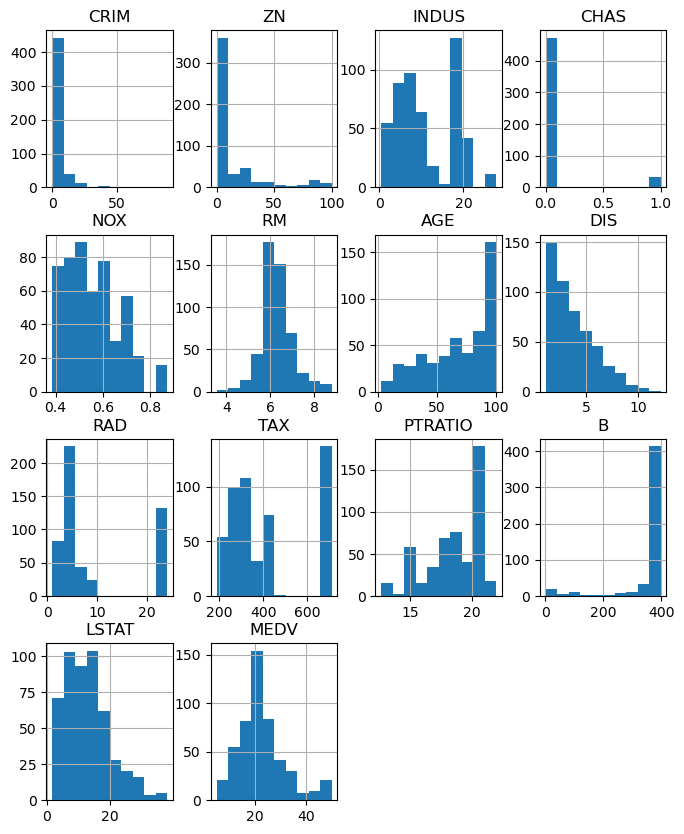

In [13]:
#creating histograms
data.hist(bins=10,figsize=(8,10))
plt.show()

In [14]:
corr_matrix = data.corr()

<Axes: >

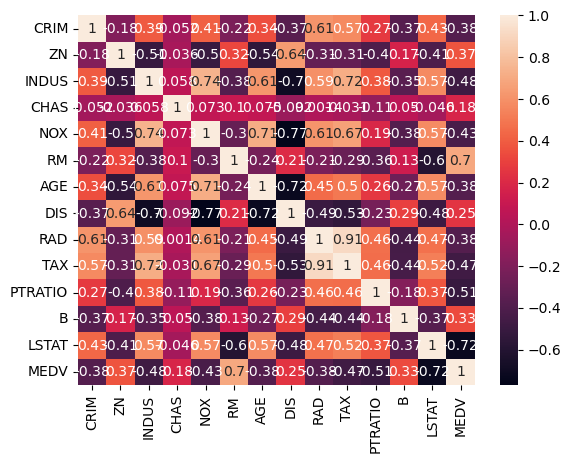

In [15]:
sns.heatmap(corr_matrix,annot=True)

# simple linear model

In [16]:
df1 = data.loc[:,["LSTAT","MEDV"]]

In [17]:
df1.head(3)

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7


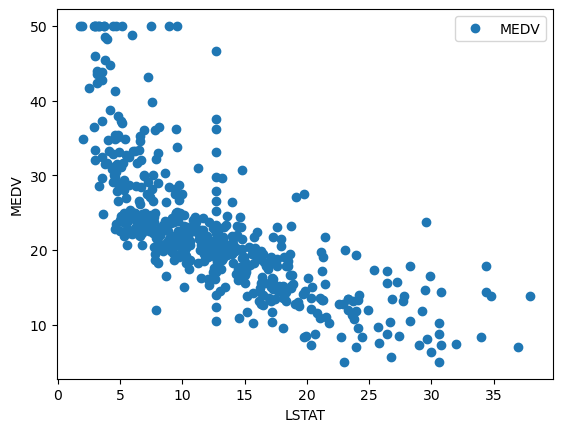

In [18]:
df1.plot(x='LSTAT',y='MEDV',style='o')
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()

In [19]:
y=df1["MEDV"]
x=df1.drop("MEDV",axis=1)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [21]:
x_train.shape

(404, 1)

In [22]:
y_train.shape

(404,)

In [23]:
x_test.shape

(102, 1)

In [24]:
y_test.shape

(102,)

In [25]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
y_predict = lr.predict(x_test)

In [27]:
#obtaining training score
train_score = lr.score(x_train,y_train)
print("Training Score is : ",train_score)

Training Score is :  0.525652771833634


In [28]:
#obtaining r2_score
score = metrics.r2_score(y_test,y_predict)
print("r2 score is : ",score)

r2 score is :  0.5046399848937972


In [29]:
print("Mean absolute error : ", metrics.mean_absolute_error(y_test,y_predict))
print("Mean squared error : ", metrics.mean_squared_error(y_test,y_predict))
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

Mean absolute error :  5.1737252039878125
Mean squared error :  48.95513713858132
Root mean squared error :  6.996794776080067


## Multiple linear regession

In [30]:
x1 = data.iloc[:,:-1]
y1 = data.iloc[:,-1]

In [31]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state=1)

In [32]:
lr1 = LinearRegression()

In [33]:
lr1.fit(x1_train,y1_train)

LinearRegression()

In [34]:
y1_predict = lr1.predict(x1_test)

In [35]:
print("Mean absolute error : ", metrics.mean_absolute_error(y1_test,y1_predict))
print("Mean squared error : ", metrics.mean_squared_error(y1_test,y1_predict))
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(y1_test,y1_predict)))

Mean absolute error :  3.8853073249392582
Mean squared error :  25.338098207682116
Root mean squared error :  5.033696276860784


In [36]:
print("Training Score : ",lr1.score(x1_train,y1_train))

Training Score :  0.722898326271528


## using backward elimination to select features to build the model again. for that we will be using statsmodel.api library

In [37]:
import statsmodels.api as sm

In [38]:
data.shape

(506, 14)

In [39]:
# adding the bias as OLS doesnot include bias term
df2 = np.append(arr = np.ones((506,1)).astype(int),values=data,axis=1)

In [40]:
data.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [41]:
df2

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [1.0000e+00, 2.7310e-02, 0.0000e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [1.0000e+00, 2.7290e-02, 0.0000e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [1.0000e+00, 6.0760e-02, 0.0000e+00, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0000e+00, 1.0959e-01, 0.0000e+00, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [1.0000e+00, 4.7410e-02, 0.0000e+00, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [42]:
#splitting the dataset into dependent and independent variables 
x_opt = data.iloc[:,:-1]
y_opt = data.iloc[:,-1]

In [43]:
# obtainng the summary and check for columns having p vlaues if greater than > 0.05
# remove that feature and continue this process for every till columns having p value <0.05 are left 
ols = sm.OLS(endog=y,exog=x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              872.2
Date:                Tue, 15 Jul 2025   Prob (F-statistic):                        0.00
Time:                        12:35:11   Log-Likelihood:                         -1529.0
No. Observations:                 506   AIC:                                      3084.
Df Residuals:                     493   BIC:                                      3139.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0953      0.034     -2.779      0.006      -0.163      -0.028
ZN             0.0452      0.014      3.143      0.002       0.017       0.074
INDUS         -0.0468      0.064     -0.735      0.463      -0.172       0.078
CHAS           3.1345      0.924      3.392      0.001       1.319       4.950
NOX           -2.9625      3.318     -0.893      0.372      -9.481       3.556
RM             6.0518      0.307     19.714      0.000       5.449       6.655
AGE           -0.0159      0.013     -1.176      0.240      -0.042       0.011
DIS           -1.0043      0.192     -5.237      0.000      -1.381      -0.628
RAD            0.1499      0.067      2.227      0.026       0.018       0.282
TAX           -0.0083      0.004     -2.110      0.035      -0.016      -0.001
PTRATIO       -0.4017      0.112     -3.600      0.000      -0.621      -0.182
B              0.0147      0.003      5.381      0.000       0.009       0.020
LSTAT         -0.3724      0.050     -7.452      0.000      -0.471      -0.274
==============================================================================
Omnibus:                      209.147   Durbin-Watson:                   0.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1461.565
Skew:                           1.644   Prob(JB):                         0.00
Kurtosis:                      10.649   Cond. No.                     8.31e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
x_opt.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [45]:
x1_opt = x_opt.iloc[:,[0,1,3,4,5,6,7,8,9,10,11,12]]

In [46]:
ols = sm.OLS(endog=y,exog=x1_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              945.8
Date:                Tue, 15 Jul 2025   Prob (F-statistic):                        0.00
Time:                        12:35:11   Log-Likelihood:                         -1529.3
No. Observations:                 506   AIC:                                      3083.
Df Residuals:                     494   BIC:                                      3133.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0945      0.034     -2.758      0.006      -0.162      -0.027
ZN             0.0462      0.014      3.229      0.001       0.018       0.074
CHAS           3.0639      0.919      3.336      0.001       1.259       4.869
NOX           -3.5685      3.212     -1.111      0.267      -9.879       2.742
RM             6.0904      0.302     20.145      0.000       5.496       6.684
AGE           -0.0159      0.013     -1.180      0.239      -0.042       0.011
DIS           -0.9674      0.185     -5.230      0.000      -1.331      -0.604
RAD            0.1629      0.065      2.512      0.012       0.035       0.290
TAX           -0.0096      0.004     -2.679      0.008      -0.017      -0.003
PTRATIO       -0.4132      0.110     -3.742      0.000      -0.630      -0.196
B              0.0148      0.003      5.427      0.000       0.009       0.020
LSTAT         -0.3736      0.050     -7.485      0.000      -0.472      -0.276
==============================================================================
Omnibus:                      209.504   Durbin-Watson:                   0.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1463.237
Skew:                           1.648   Prob(JB):                         0.00
Kurtosis:                      10.651   Cond. No.                     8.04e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
x2_opt = x1_opt.iloc[:,[0,1,2,4,5,6,7,8,9,10,11]]

In [48]:
ols = sm.OLS(endog=y,exog=x2_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              1031.
Date:                Tue, 15 Jul 2025   Prob (F-statistic):                        0.00
Time:                        12:35:11   Log-Likelihood:                         -1529.9
No. Observations:                 506   AIC:                                      3082.
Df Residuals:                     495   BIC:                                      3128.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0931      0.034     -2.717      0.007      -0.160      -0.026
ZN             0.0472      0.014      3.298      0.001       0.019       0.075
CHAS           3.0070      0.917      3.278      0.001       1.205       4.809
RM             5.9304      0.266     22.305      0.000       5.408       6.453
AGE           -0.0200      0.013     -1.542      0.124      -0.045       0.005
DIS           -0.9215      0.180     -5.110      0.000      -1.276      -0.567
RAD            0.1700      0.065      2.633      0.009       0.043       0.297
TAX           -0.0109      0.003     -3.219      0.001      -0.017      -0.004
PTRATIO       -0.4171      0.110     -3.778      0.000      -0.634      -0.200
B              0.0145      0.003      5.339      0.000       0.009       0.020
LSTAT         -0.3915      0.047     -8.279      0.000      -0.484      -0.299
==============================================================================
Omnibus:                      208.030   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1410.372
Skew:                           1.645   Prob(JB):                    5.52e-307
Kurtosis:                      10.488   Cond. No.                     2.30e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
x3_opt = x2_opt.iloc[:,[0,1,2,3,5,6,7,8,9,10]]

In [50]:
x3_opt.head(2)

,CRIM,ZN,CHAS,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,0.0,6.575,4.0900,1,296,15.3,396.9,4.98
1,0.02731,0.0,0.0,6.421,4.9671,2,242,17.8,396.9,9.14


In [51]:
ols = sm.OLS(endog=y,exog=x3_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              1131.
Date:                Tue, 15 Jul 2025   Prob (F-statistic):                        0.00
Time:                        12:35:11   Log-Likelihood:                         -1531.1
No. Observations:                 506   AIC:                                      3082.
Df Residuals:                     496   BIC:                                      3125.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0937      0.034     -2.731      0.007      -0.161      -0.026
ZN             0.0502      0.014      3.538      0.000       0.022       0.078
CHAS           2.9237      0.917      3.188      0.002       1.122       4.725
RM             5.7808      0.248     23.320      0.000       5.294       6.268
DIS           -0.8055      0.164     -4.907      0.000      -1.128      -0.483
RAD            0.1791      0.064      2.782      0.006       0.053       0.306
TAX           -0.0116      0.003     -3.461      0.001      -0.018      -0.005
PTRATIO       -0.4268      0.110     -3.867      0.000      -0.644      -0.210
B              0.0141      0.003      5.221      0.000       0.009       0.019
LSTAT         -0.4217      0.043     -9.791      0.000      -0.506      -0.337
==============================================================================
Omnibus:                      201.411   Durbin-Watson:                   1.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.892
Skew:                           1.601   Prob(JB):                    6.57e-282
Kurtosis:                      10.153   Cond. No.                     2.28e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
#as no such columns are left having p values > 0.05 we will now build our model

x2_train,x2_test,y2_train,y2_test = train_test_split(x3_opt,y_opt,test_size=0.2,random_state=1)

In [53]:
lr2 = LinearRegression()
lr2.fit(x2_train,y2_train)

LinearRegression()

In [54]:
y2_predict =lr2.predict(x2_test)

In [55]:
print("Training Score : ",lr2.score(x2_train,y2_train))

Training Score :  0.7045366984329462


In [56]:
print("Mean absolute error : ", metrics.mean_absolute_error(y2_test,y2_predict))
print("Mean squared error : ", metrics.mean_squared_error(y2_test,y2_predict))
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(y2_test,y2_predict)))

Mean absolute error :  3.8876875787516356
Mean squared error :  25.222824037418405
Root mean squared error :  5.022232973231967


Note: As the root mean squared error for the final model is minimum 
we will be considering this model for predicting future outcome